**IOT Project --**
 **Mark Diffrence between two images**

*   **NILADRI MULLICK - 17UEC081**
*   ****



<function matplotlib.pyplot.show>

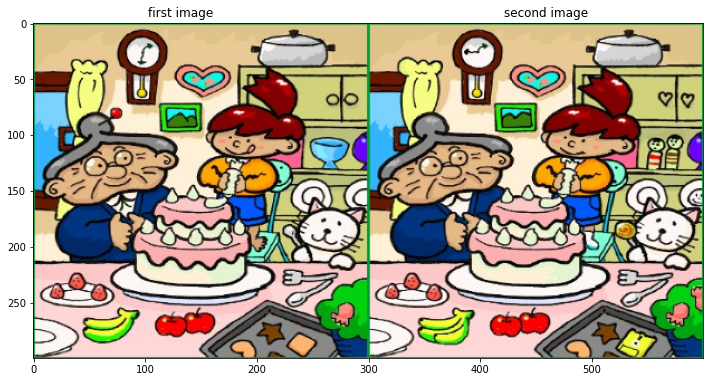

In [0]:
right_image_name='room1.jpg'
left_image_name='room2.jpg'
import numpy as np 
import cv2 
from google.colab.patches import cv2_imshow
from PIL import Image, ImageChops
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12,24
img11 = cv2.imread(right_image_name)
#img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img22 = cv2.imread(left_image_name)
#img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)



#print(img11.shape,img22.shape)
img11=cv2.resize(img11,(300,300))
img22=cv2.resize(img22,(300,300))
img111 = img11[:,:,::-1]
img222 = img22[:,:,::-1]
im_h = cv2.hconcat([img111, img222])
plt.imshow(im_h)
plt.title("first image                                                                           second image")
plt.show


**Here we see our two original images**

In [0]:

def processing(right_image_name,left_image_name,t,y):
    img1=Image.open(right_image_name)
    img2=Image.open(left_image_name)

    


    diff= ImageChops.difference(img1,img2) 
    img=np.array(diff)
    img=cv2.resize(img,(300,300))
    #cv2_imshow(img)

    for i in range(300//t):
        for j in range(300//t):
            temp=img[i*t:t*i+t, j*t:t*j+t]
            if temp.sum()>y:
                img[i*t:t*i+t, j*t:t*j+t]=255*np.ones((t,t,3))
    
    im = img
    


    ret, threshed_img = cv2.threshold(cv2.cvtColor(im, cv2.COLOR_BGR2GRAY),127, 255, cv2.THRESH_BINARY)


    contours = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]


    l=[]
    for c in contours:
        #print(c)
        rect = cv2.boundingRect(c)
        if rect[2] < 10 or rect[3] < 10: continue
    
        x, y, w, h = cv2.boundingRect(c)
        l.append((x, y, w, h ))
    return l


In [0]:
def mode(i,j):
    
    l=processing(right_image_name,left_image_name,i,j)
    img11 = cv2.imread(right_image_name)
    #img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img22 = cv2.imread(left_image_name)
    #img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
        
    img11=cv2.resize(img11,(300,300))
    img22=cv2.resize(img22,(300,300))


    
    
    for (x,y,w,h) in l:

        

        cv2.rectangle(img11, (x, y), (x+w, y+h), (255,255,0), 3)
        cv2.rectangle(img22, (x, y), (x+w, y+h), (255,255,0), 3)

    img111 = img11[:,:,::-1]
    
    img222 = img22[:,:,::-1]
    im_h = cv2.hconcat([img111, img222])
    
    return im_h,l
    



When prompted enter the no. expected diffrences (15 for this one room_image)


1.   For room image no of expected diffrences= 15
2.   For leaf image no. of expected diffrences= 5
3.   For fruits image, no.of expected diffrences= 5
4.   For things image, no.of expected diffrences= 7


Enter the expected no. of diffrences(15 for this one)15


<function matplotlib.pyplot.show>

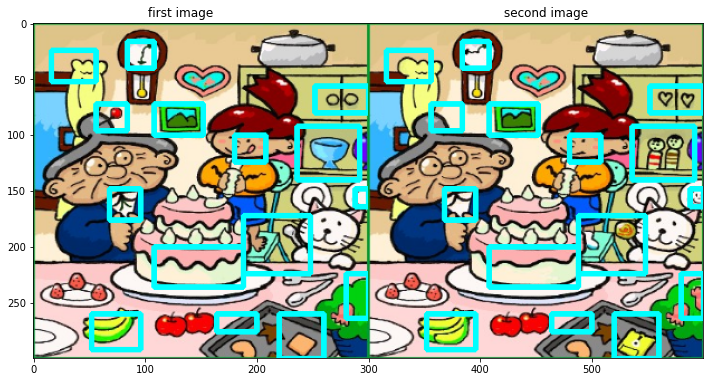

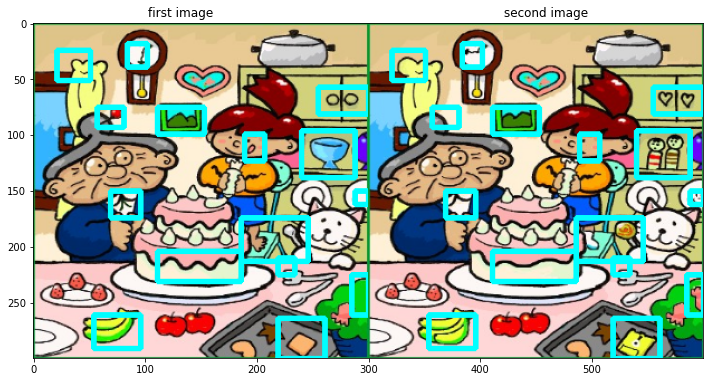

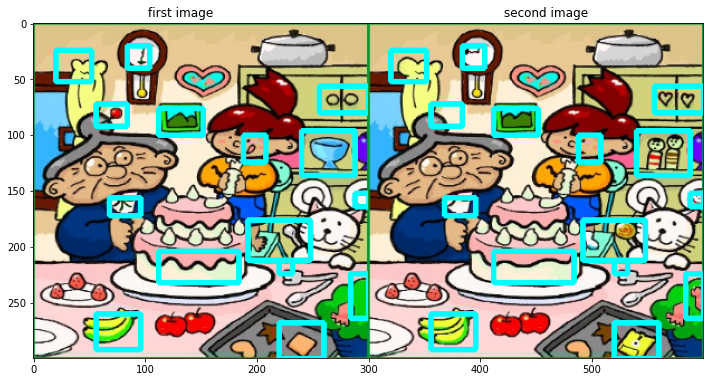

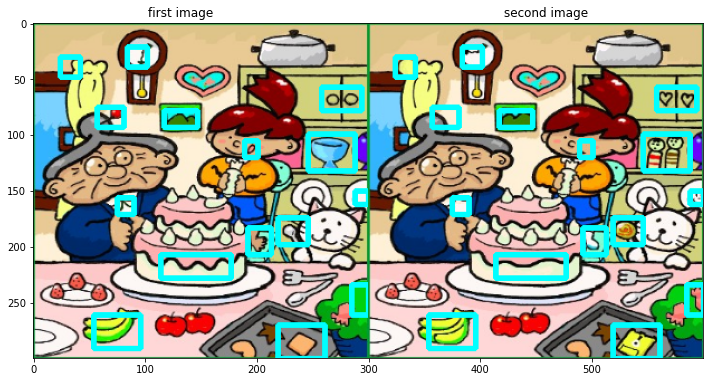

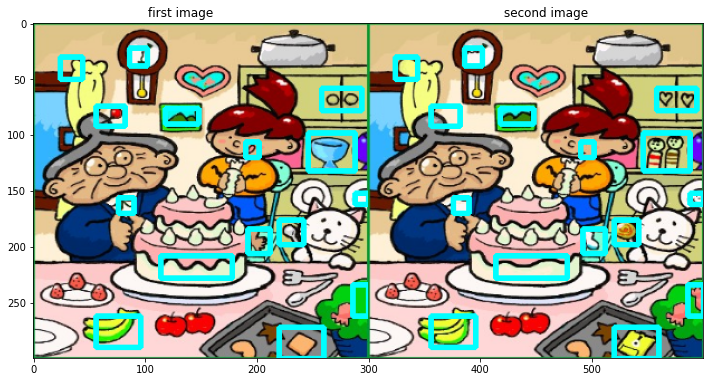

In [0]:
d=dict()
d2=dict()
dd=dict()
exp=int(input("Enter the expected no. of diffrences(15 for this one)"))
li=[]
for i in [2,3,4,5,6,10]:
  for j in [100,200,300,500,1000]:
    if i>6 and j<500:
      continue
    else:
      ff=0
      im_h,l=mode(i,j)
      cou=0
      area=0
      for (q,w,e,r) in l:
        if e*r>22500:
          ff=1
          break
          
          
          
        else:
      
      
          area+=e*r
        cou+=1
      if ff==1:
        continue
      
      
      c=abs(exp-len(l))
      ll=area
      li.append(c)
      
      if c not in d:
          d[c]=[im_h]
          d2[c]=[ll]
          dd[c]=[l]
        
      else:
          d[c]=d[c]+[im_h]
          d2[c]=d2[c]+[ll]
          dd[c]=dd[c]+[l]
        

l2=[]
for i in li:
  if i not in l2:
    l2.append(i)
l3=[]
l4=[]
ll3=[]
for i in sorted(l2):
    for n in d[i]:
      l3.append(n)
    for k in d2[i]:
      l4.append(k)
    for kk in dd[i]:
      ll3.append(kk)
d3={} 
dd4={}         
no_of_img=5
count=0
for i in l4[:no_of_img]:
  d3[i]=l3[count]
  dd4[i]=ll3[count]
  count+=1
l5=[]
ll5=[]
for i in sorted(l4[:no_of_img],reverse=True):
  l5.append(d3[i])
  ll5.append(dd4[i])




a=0
for i in l5:
 
  a+=1
  plt.figure(a)
  plt.imshow(i)
  plt.title("first image                                                                           second image")

    

plt.show



Thus the blue color rectangular box shows the spots where there are diffrences between the two images


The above five pair of images shows the the five best pairs of diffrences . As we can see, the fourth pair looks more clean and shows exactly 15 diffrences and hence is the accurate representation.










<function matplotlib.pyplot.show>

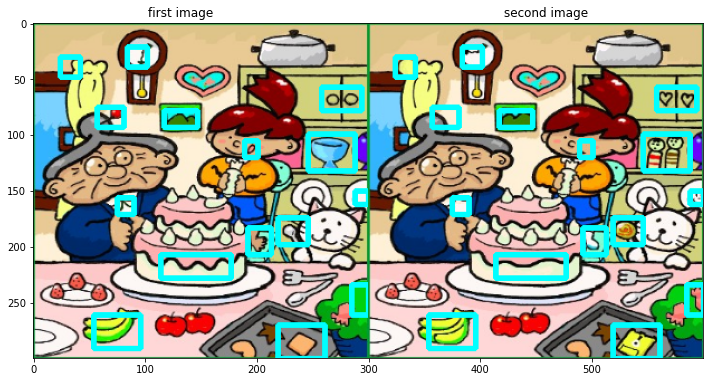

In [0]:
most_acc_pair=4

plt.imshow(l5[most_acc_pair-1])
plt.title("first image                                                                           second image")

    
plt.show


**Final Answer**